In [85]:
import numpy as np
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, ClassifierMixin
import matplotlib.pyplot as plt
from functools import partial
from sklearn.calibration import calibration_curve

## 3.3-2

In [36]:
def f_objective(theta, X, y, l2_param=1):
    '''
    Args:
        theta: 1D numpy array of size num_features
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        l2_param: regularization parameter

    Returns:
        objective: scalar value of objective function
    '''
    n = X.shape[0]
    loss = (-y) * np.dot(X,theta)
    loss = np.logaddexp(0,loss)
    loss = np.sum(loss)/n
    
    reg = np.linalg.norm(theta, ord=2)**2 ## np.dot(theta, theta) 혹은 theta@theta로 해도됨.    
    objective = loss + l2_param*reg

    return objective
    

## 3.3-3

In [53]:
def fit_logistic_reg(X, y, objective_function, l2_param=1):
    '''
    Args:
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        objective_function: function returning the value of the objective
        l2_param: regularization parameter
        
    Returns:
        optimal_theta: 1D numpy array of size num_features
    '''

    n, num_ftrs = X.shape
    
    obj = partial(objective_function, X=X, y=y, l2_param=l2_param)
    
    
    w_0 = np.zeros(num_ftrs)
    w = minimize(obj, w_0).x
    return w

In [15]:
np.logaddexp(0,np.array([1,2,3]))

array([1.31326169, 2.12692801, 3.04858735])

In [15]:
X = np.array([[1,2],[3,4]])
y = np.array([1,-1])
theta = np.array([2,3])
f_objective(theta, X, y)

9.000167710801437
12.999999999999998


22.000167710801435

In [20]:
ss = StandardScaler()
a = np.array([[1,1,5],[1,2,2]])
X_ = ss.fit_transform(a)
X_

array([[ 0., -1.,  1.],
       [ 0.,  1., -1.]])

In [17]:
np.hstack((X,np.ones((X.shape[0],1))))

array([[1., 2., 1.],
       [3., 4., 1.]])

In [24]:
d = np.loadtxt('X_train.txt', delimiter=',')
d.shape

(1600, 20)

In [25]:
y = np.loadtxt('y_train.txt',  delimiter=',')
y.shape

(1600,)

## 3.3-4
 - lambda = 0.03을 선택한다.

In [63]:
X_train = np.loadtxt('X_train.txt', delimiter=',')
y_train = np.loadtxt('y_train.txt',  delimiter=',')
X_val = np.loadtxt('X_val.txt',  delimiter=',')
y_val = np.loadtxt('y_val.txt',  delimiter=',')

y_train[y_train == 0] = -1 ## label이 0인건 -1로 바꾼다.
y_val[y_val == 0] = -1

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1)))) ## add bias term
X_val = ss.fit_transform(X_val)
X_val = np.hstack((X_val, np.ones((X_val.shape[0], 1)))) ## add bias term

Text(0, 0.5, 'empirical risk')

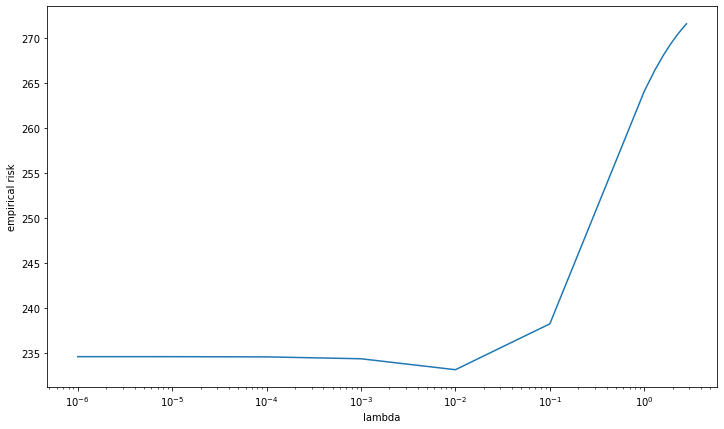

In [79]:
def NLL(w,X,y):

    likelhood = (-y) * np.dot(X,w)
    likelhood = np.logaddexp(0,likelhood)
    likelhood = np.sum(likelhood)
    
    return likelhood

# candi = np.logspace(-5, -1, 40)
candi = np.unique(np.concatenate((10.**np.arange(-6,1,1),np.arange(1,3,.3))))
NLLs = []
n = X_val.shape[0]
for lambda_reg in candi:
    w = fit_logistic_reg(X_train, y_train, f_objective, lambda_reg)
    likelhood = NLL(w, X_val, y_val)
    NLLs.append(likelhood)

plt.figure(figsize=(12,7))
plt.xscale('log')
plt.plot(candi,NLLs)
plt.xlabel('lambda')
plt.ylabel('empirical risk')



[233.15476889569896, 232.8746001404337, 233.12846335757717, 233.65408068760973, 234.32600635616978, 235.07513126995454, 235.86083705566983, 236.66169791554887, 237.4613329660955]


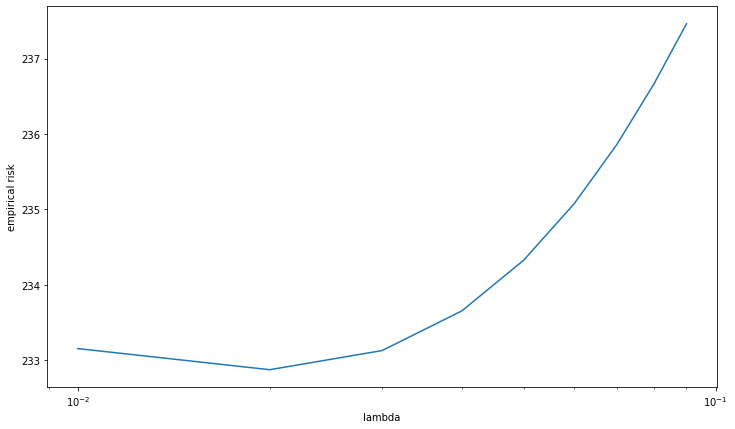

In [84]:
candi = np.arange(1,10)*0.01
NLLs = []
n = X_val.shape[0]
for lambda_reg in candi:
    w = fit_logistic_reg(X_train, y_train, f_objective, lambda_reg)
    likelhood = NLL(w, X_val, y_val)
    NLLs.append(likelhood)

plt.figure(figsize=(12,7))
plt.xscale('log')
plt.plot(candi,NLLs)
plt.xlabel('lambda')
plt.ylabel('empirical risk')
print(NLLs)

## 3.3-5

In [86]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [88]:
w = fit_logistic_reg(X_train, y_train, f_objective, 0.03)

In [90]:
predicted_positive_prob = sigmoid(X_val@w)

In [104]:
positive_prob, mean_predicted_positive_prob = calibration_curve(y_val, predicted_positive_frac, n_bins= 6)

 - calibration_curve가 대충 s자 모양이다.

Text(0, 0.5, 'positive_prob')

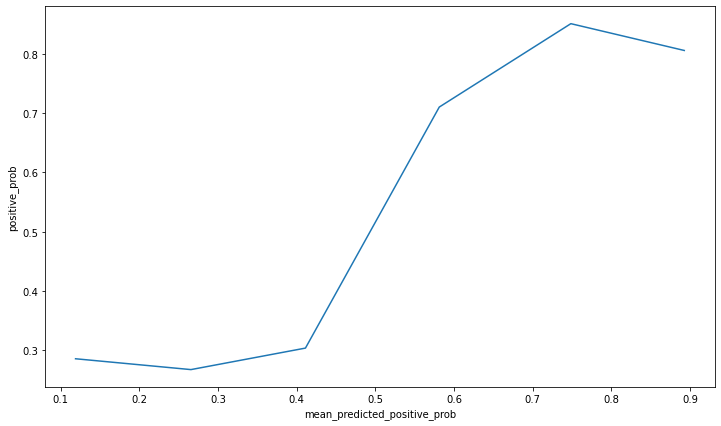

In [106]:
plt.figure(figsize = (12,7))
plt.plot(mean_predicted_positive_prob,positive_prob)
plt.xlabel('mean_predicted_positive_prob')
plt.ylabel('positive_prob')